## Adaptation and Learning Exam Q6

#### Initial setting

In [2]:
# import libraries
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt
from tqdm import tqdm

In [342]:
# set parameters
params = {
    'mu':0.01,
    'rho':0.1,
    'maxit': 2000
}

In [356]:
# set initial condition
R = np.array([[3,0,4,0,1,5,0,0,1],
              [3,4,0,0,2,0,4,4,0],
              [0,5,2,1,1,2,4,5,3],
              [0,0,0,4,0,0,0,2,5],
              [3,2,4,0,3,3,3,3,0],
              [0,3,3,2,2,0,1,0,1],
              [0,1,0,0,0,3,0,2,4]])
# R = np.array([[1,0,2],[0,2,3],[1,2,0]])
idx_u,idx_i = np.nonzero(R)
num_u = R.shape[0] # num of users
num_i = R.shape[1] # num of movies
num_feature = 10 # num of features
H = np.random.rand(num_feature, num_i)/np.sqrt(num_feature)
W = np.random.rand(num_u, num_feature)/np.sqrt(num_feature)
theta = np.random.rand(num_u)/np.sqrt(num_feature)
alpha = np.random.rand(num_i)/np.sqrt(num_feature)

In [335]:
# define cost function
def cost(R, H, W, idx_u, idx_i, params):
    rho = params['rho']
    sum_r = 0
    for k in range(len(idx_u)):
        u = idx_u[k]
        i = idx_i[k]
        sum_r += (R[u,i] - H[:,i]@W[u,:] + theta[u] + alpha[i])**2
    return rho*(lg.norm(H)**2+lg.norm(W)**2) + sum_r

In [278]:
def cost1(R, H, W, idx_u, idx_i, params):
    rho = params['rho']
    sum_r = 0
    for k in range(len(idx_u)):
        u = idx_u[k]
        i = idx_i[k]
        sum_r += (R[u,i] - H[:,i]@W[u,:] + theta[u] + alpha[i])**2
    return rho*(lg.norm(H)**2+lg.norm(W)**2)

In [279]:
def cost2(R, H, W, idx_u, idx_i, params):
    rho = params['rho']
    sum_r = 0
    for k in range(len(idx_u)):
        u = idx_u[k]
        i = idx_i[k]
        sum_r += (R[u,i] - H[:,i]@W[u,:] + theta[u] + alpha[i])**2
    return sum_r

In [338]:
# perform martrix factorization
def matrix_factoriztion(R, idx_u, idx_i, H, W, theta, alpha, params):
    mu = params['mu']
    rho = params['rho']
    log = []
    for n in range(params['maxit']):
        log.append(cost(R, H, W, idx_u, idx_i, params))
        k = np.random.randint(len(idx_i))
        u = idx_u[k]
        i = idx_i[k]
        e = R[u,i] - H[:,i]@W[u,:] + theta[u] + alpha[i]
        w_u = W[u,:].copy()
        W[u,:] = (1-2*mu*rho)*w_u + 2*mu*H[:,i]*e
        H[:,i] = (1-2*mu*rho)*H[:,i] + 2*mu*w_u*e
        theta[u] = theta[u] + 2*mu*e
        alpha[i] = alpha[i] + 2*mu*e
    return W,H,theta,alpha,log

In [337]:
# reconstructed reputation matrix
def R_recov(W,H,theta,alpha,num_i,num_u):
    return W@H - np.outer(theta,np.ones(num_i)) - np.outer(np.ones(num_u), alpha)

In [357]:
# do simulation
W,H,theta,alpha,log = matrix_factoriztion(R, idx_u, idx_i, H, W, theta, alpha, params)

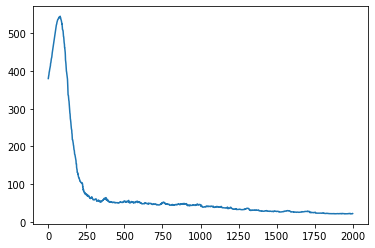

In [358]:
# ensure the cost converge as iteration goes
plt.plot(log)

In [359]:
# compare reconstructed R and original R
np.round(R_recov(W,H,theta,alpha,num_i,num_u),decimals=0).astype(int)

array([[3, 2, 4, 2, 2, 4, 2, 3, 1],
       [3, 4, 3, 2, 2, 3, 4, 4, 3],
       [2, 4, 2, 1, 1, 2, 4, 4, 3],
       [3, 3, 3, 4, 2, 3, 3, 3, 5],
       [3, 2, 3, 2, 2, 3, 2, 3, 2],
       [2, 2, 3, 2, 2, 2, 2, 2, 1],
       [2, 2, 2, 2, 1, 3, 3, 2, 4]])

In [360]:
R

array([[3, 0, 4, 0, 1, 5, 0, 0, 1],
       [3, 4, 0, 0, 2, 0, 4, 4, 0],
       [0, 5, 2, 1, 1, 2, 4, 5, 3],
       [0, 0, 0, 4, 0, 0, 0, 2, 5],
       [3, 2, 4, 0, 3, 3, 3, 3, 0],
       [0, 3, 3, 2, 2, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 3, 0, 2, 4]])